In [37]:
import pandas as pd
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

from scipy import optimize
from scipy.integrate import odeint
from scipy import fftpack

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [38]:
def f(xy):
    x = xy[0]
    y = xy[1]
    return (4 - 2.1*x**2 + (x**4)/3)*x**2 + x*y + (4*y**2 - 4)*y**2

<ipython-input-39-a6860b3b56fb>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, Z)


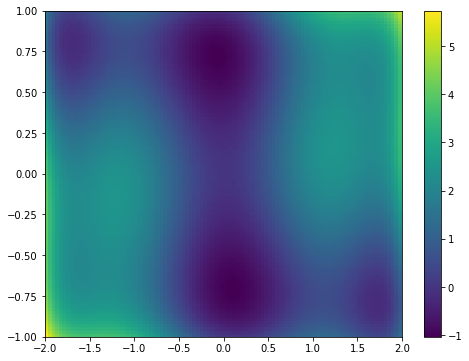

In [39]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y) # it creates 2 matrices, one with the values of X as rows and one with the values of y as columns 
XY = [X, Y]
Z = f(XY)

plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()

In [41]:
xy_start = [[0,0.75], [0,-0.75], [-2, 0.75], [2, -0.75]]

for i in xy_start:
    minima = optimize.minimize(f, i)
    print("(x_min, y_min) :", minima.x, "for which f(x_min, y_min)=", minima.fun)

(x_min, y_min) : [-0.08984202  0.71265641] for which f(x_min, y_min)= -1.0316284534898768
(x_min, y_min) : [ 0.08984201 -0.71265642] for which f(x_min, y_min)= -1.0316284534898743
(x_min, y_min) : [-0.08984237  0.71265591] for which f(x_min, y_min)= -1.0316284534871936
(x_min, y_min) : [ 0.08984236 -0.71265592] for which f(x_min, y_min)= -1.0316284534873519


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [42]:
# costant settings
Q = 2.0
d = 1.5
Omega = 0.65

In [43]:
# definition of the derivative function

def derivative(theta, time, Q, d, Omega):
    return(theta[1], -theta[1]/Q + np.sin(theta[0]) + d*np.cos(Omega*time))

t = np.linspace(0, 70, 200)
theta_init = (0, 0)
theta = odeint(derivative, theta_init, t, args=(Q, d, Omega))

Text(0.5, 1.0, 'Evolution of $\\omega(t)$ as a function of time')

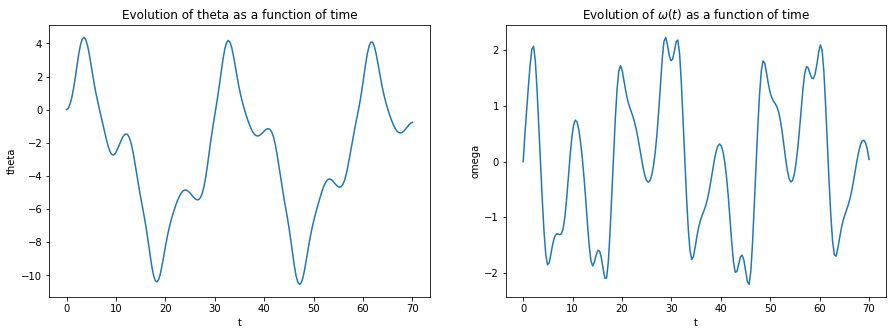

In [45]:
# plot of theta and omega as functions of time

fig, (ax, axdot) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax.plot(t, theta[:, 0])
ax.set_xlabel('t')
ax.set_ylabel('theta')
ax.set_title('Evolution of theta as a function of time')

axdot.plot(t, theta[:, 1])
axdot.set_xlabel('t')
axdot.set_ylabel('omega')
axdot.set_title('Evolution of $\omega(t)$ as a function of time')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [46]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables

data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

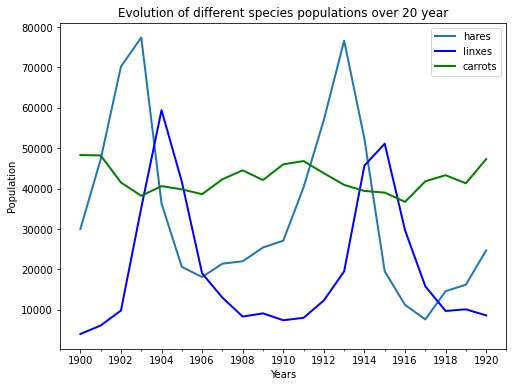

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(year, hares, linewidth=2, label='hares')
ax.plot(year, lynxes, color='blue', linewidth=2, label='linxes')
ax.plot(year, carrots, color='green', linewidth=2, label='carrots')

ax.legend(loc='best')
ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.set_title('Evolution of different species populations over 20 year')

ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))

[ 0.          0.04761905  0.0952381   0.14285714  0.19047619  0.23809524
  0.28571429  0.33333333  0.38095238  0.42857143  0.47619048 -0.47619048
 -0.42857143 -0.38095238 -0.33333333 -0.28571429 -0.23809524 -0.19047619
 -0.14285714 -0.0952381  -0.04761905]
[715700.          43153.78711394 270656.13549636   6079.25264315
 131023.99485858   8384.94660598  52023.22933943   5356.30469634
  24986.33741813   5032.52385963  22825.76088643  22825.76088643
   5032.52385963  24986.33741813   5356.30469634  52023.22933943
   8384.94660598 131023.99485858   6079.25264315 270656.13549636
  43153.78711394]


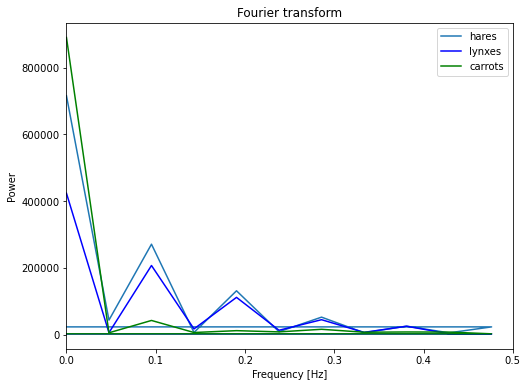

In [50]:
# The FFT of each population
hares_fft = fftpack.fft(hares)
lynxes_fft = fftpack.fft(lynxes)
carrots_fft = fftpack.fft(carrots)

# And the power (sig_fft is of complex dtype)
hares_power = np.abs(hares_fft) # these are the "weights" of the Fourier components for each discrete frequency interval
lynxes_power = np.abs(lynxes_fft)
carrots_power = np.abs(carrots_fft)

# The return the corresponding frequencies
hares_freq = fftpack.fftfreq(hares.size, d=1.0)
lynxes_freq = fftpack.fftfreq(lynxes.size, d=1)
carrots_freq = fftpack.fftfreq(lynxes.size, d=1)


# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(hares_freq, hares_power, '-', markersize=7, label='hares')
plt.plot(lynxes_freq, lynxes_power, '-', markersize=7, color='blue', label='lynxes')
plt.plot(carrots_freq, carrots_power, '-', markersize=7, color='green', label='carrots')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('Fourier transform')
plt.xlim(0, 0.5)
plt.legend(loc='best')

print(hares_freq)
print(hares_power)

In [51]:
# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(hares_freq > 0)
freqs = hares_freq[pos_mask]
powes = hares_power[pos_mask]

# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)
print('Period:', 1/peak_freq, 'years')

Peak frequency: 0.09523809523809523
Period: 10.5 years


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Noisy image')

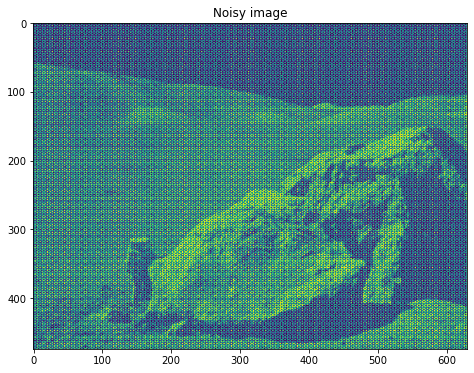

In [52]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(10,6))
noisy_png = plt.imread("moonlanding.png")
plt.imshow(noisy_png)
plt.title('Noisy image')

Text(0.5, 1.0, 'Shifted fourier transformed of the noisy image')

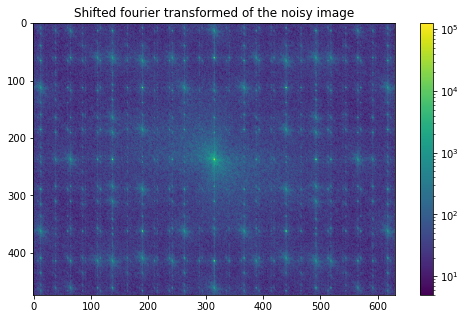

In [53]:
from matplotlib.colors import LogNorm

# fourier transform of the image and shift of the zero frequency at the center of the spectrum
png_fft = fftpack.fftshift(fftpack.fft2(noisy_png)) 
amplitude = abs(png_fft)

plt.figure(figsize=(9,5))
plt.imshow(amplitude, norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Shifted fourier transformed of the noisy image')

Text(0.5, 1.0, 'Fourier transformed cleaned from the periodic noise')

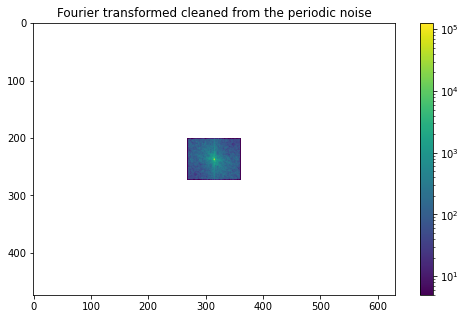

In [54]:
deltaX = 35 
deltaY = 45
png_fft2 = png_fft.copy()

# setting to zero all the periodic noise outside the center region
png_fft2[0:237-deltaX, :] = 0
png_fft2[237+deltaX:474, :] = 0
png_fft2[:, 0:315-deltaY] = 0
png_fft2[:, 315+deltaY:630] = 0

plt.figure(figsize=(9,5))
plt.imshow(abs(png_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transformed cleaned from the periodic noise')

Text(0.5, 1.0, 'Original image without the periodic noise')

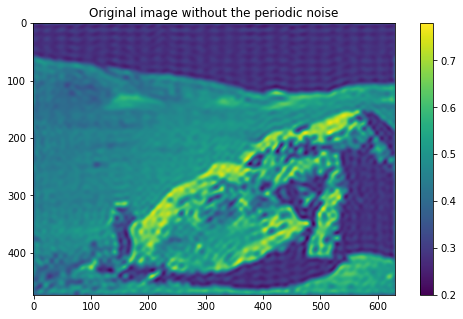

In [55]:
# Inverse fourier transform to obtain the corrected image 
filtered_image = fftpack.ifft2((png_fft2))

plt.figure(figsize=(9,5))
plt.imshow(abs(filtered_image))
plt.colorbar()
plt.title('Original image without the periodic noise')